### **Determine the optimum number of clusters for the Iris dataset using the elbow method and then visualize the clusters**



In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

*Load the iris dataset*

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

****Finding the optimum number of clusters for k-means classification****

In [3]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

*Try different numbers of clusters from 1 to 10*

In [4]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

***Plotting the results onto a line graph to find the elbow point***

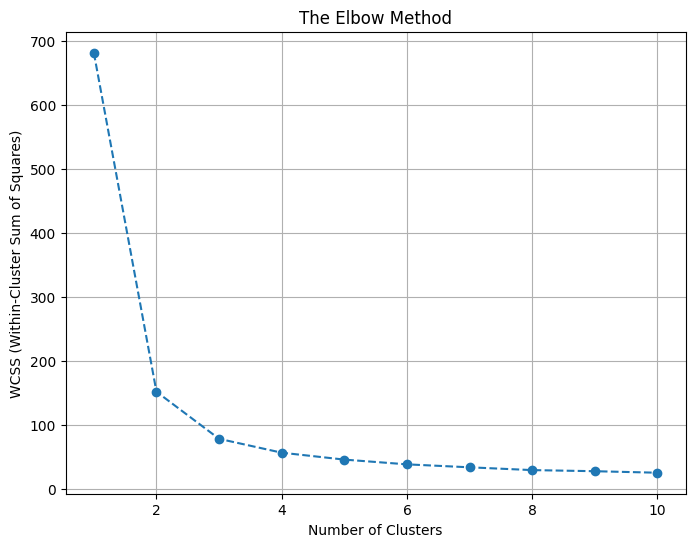

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()


**Applying k-means to the dataset with the optimum number of clusters (3)**

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++',
                max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

*Visualizing the clusters on the first two columns*

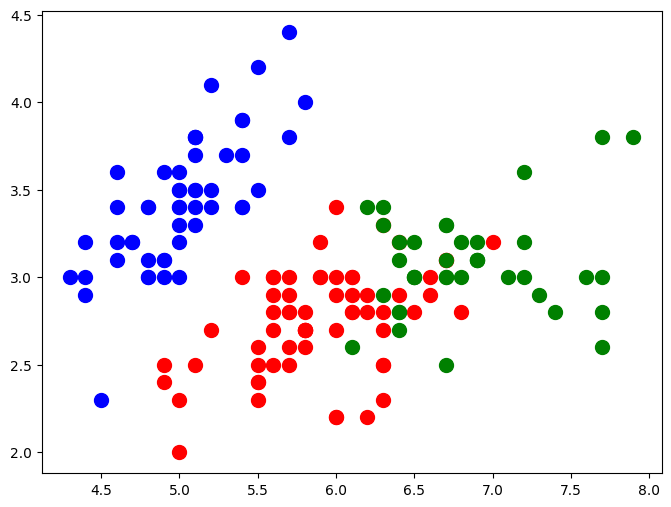

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], 
            s=100, c='green', label='Iris-virginica')


*Plotting the centroids of the clusters*

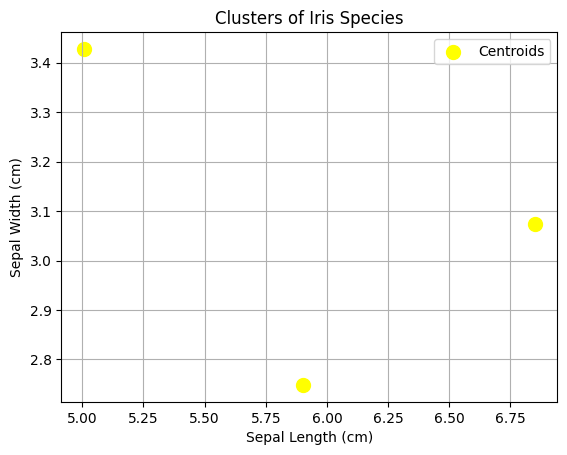

In [8]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='yellow', label='Centroids')
plt.title('Clusters of Iris Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()